In [2]:
!pip install nltk

   ---------------------------------------- 0.0/1.5 MB ? eta -:--:--
   ---------------------------------------- 1.5/1.5 MB 82.9 MB/s eta 0:00:00


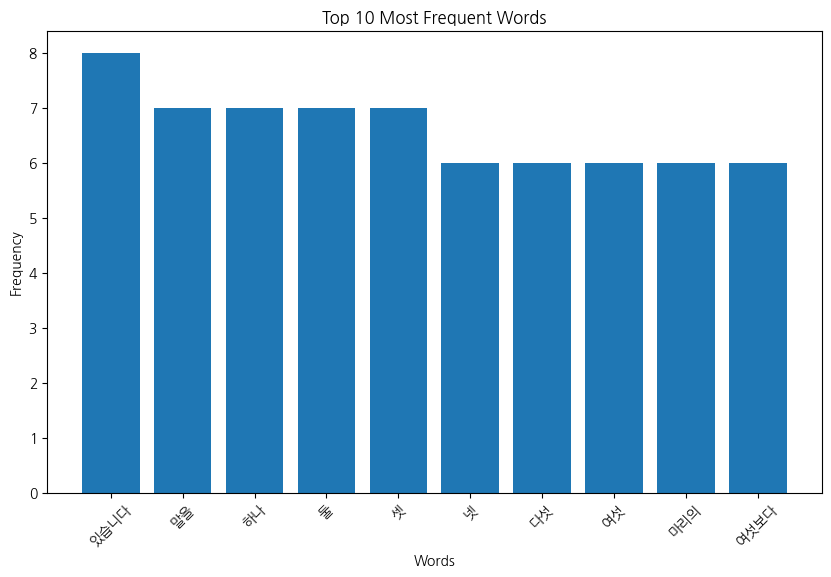

In [2]:
from matplotlib import font_manager
import matplotlib.pyplot as plt
from collections import Counter
import re
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

input_directory = "./khan_text/"
import nltk

# 한글 폰트 설정
font_path = "C:/Users/user/Desktop/Chunjae_edu/ETC/글꼴/나눔 글꼴/나눔고딕/NanumFontSetup_TTF_GOTHIC/NanumGothic.ttf"  # 폰트 경로 (로컬 환경에 맞게 수정 필요)
font = font_manager.FontProperties(fname=font_path).get_name()
plt.rc("font", family=font)

# # nltk 다운로드 (처음 실행 시)
# nltk.download('punkt')
# nltk.download('stopwords')

# 강의 텍스트 예시
text = """
Gavin은 이런 말들이 있습니다. 아래의 각 사진에 있는 말의 수가 Gavin이 가진 말의 수보다 많은지, 적은지, 아니면 같은지 알아봅시다. 그러니 우선 Gavin이 얼마나 많은 말을 가지고 있는지 봅시다. 그는 하나, 둘, 셋, 넷, 다섯, 여섯 마리의 말을 가지고 있습니다. 좋습니다, 그것을 기억합시다. 그리고 이런 양의 말을 Gavin이 가진 여섯 마리의 말과 비교합시다. 그럼 여기를 봅시다. 여기서 우리는 하나, 둘, 셋, 넷, 다섯, 여섯 마리의 말을 가지고 있습니다. 그래서 이것은 Gavin이 가진 수와 같습니다. 그들은 단지 다르게 배열되어 있을 뿐입니다. 그래서 이것은 같습니다. 우리는 같은 양에 놓겠습니다. 

이제 여기서는 하나, 둘, 셋, 넷, 다섯 마리의 말을 가지고 있습니다. 그래서 이것은 Gavin이 가진 여섯 마리의 말보다 적습니다. 다섯은 여섯보다 적습니다. 이제 하나, 둘, 셋, 넷, 다섯과 다른 다섯, 즉 십 마리의 말을 볼 수 있습니다. 또는 하나, 둘, 셋, 넷, 다섯, 여섯, 일곱, 여덟, 아홉, 십으로 셀 수 있습니다. 줄곧, 십은 여섯보다 많습니다.. 십은 여섯보다 많으므로, 더 많은 양에 놓겠습니다.

이제 여기에 넷과 넷이 있습니다. 그것은... 하나, 둘, 셋, 넷, 다섯, 여섯, 칠, 팔입니다. 다시 말해, 이것은 여기의 여섯보다 더 많습니다. 그것은 여섯보다 많습니다. 그리고 여기서 우리는 하나, 둘, 셋, 넷의 말을 가지고 있습니다. 그럼, 넷은 여섯보다 적습니다. 그래서 그것을 적은 양에 놓겠습니다. 그냥 이렇게. 그리고 우리의 대답을 확인해봅시다. 어떻게 했는지 알아봅시다. 고마워요. 우린 맞았구나.
"""


# 소문자로 변환하고 특수문자 제거
text = text.lower()
text = re.sub(r"[^\w\s]", "", text)

# 단어 토큰화
words = word_tokenize(text)

# 불용어 제거 (nltk의 불용어 리스트 사용)
stop_words = set(stopwords.words("english"))
filtered_words = [word for word in words if word not in stop_words]

# 단어 빈도 계산
word_freq = Counter(filtered_words)

# 가장 많이 등장한 상위 10개 단어
most_common_words = word_freq.most_common(10)

# 그래프 그리기
words, counts = zip(*most_common_words)
plt.figure(figsize=(10, 6))
plt.bar(words, counts)
plt.title("Top 10 Most Frequent Words")
plt.xlabel("Words")
plt.ylabel("Frequency")
plt.xticks(rotation=45)
plt.show()

In [3]:
import nltk

In [4]:
nltk.download("stopwords")

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\user\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\stopwords.zip.


True

In [4]:
api = 

In [23]:
import openai
import os

# OpenAI API 키 설정
openai.api_key = api
category = [
    "수",
    "덧셈",
    "뺄셈",
    "곱셈",
    "나눗셈",
    "분수",
    "소수",
    "소수점",
    "길이",
    "시간",
    "화폐",
    "측정",
    "각도",
    "평면도형",
    "입체도형",
    "도형",
    "대칭",
    "원",
    "직각",
    "비율",
    "비례식",
    "비",
    "그래프",
    "통계",
    "확률",
    "약수",
    "배수",
    "함수",
]
# 번역 및 요약할 긴 영어 텍스트
video_folder_path = "./khan_text_transed"
count = 0
for filename in os.listdir(video_folder_path):

    text_to_summarize = filename
    # GPT-4를 사용하여 텍스트를 주제별로 나누고 번역 및 요약
    response = openai.ChatCompletion.create(
        model="gpt-4o",
        messages=[
            {"role": "system", "content": "You are analist. "},
            {
                "role": "user",
                "content": f"이 텍스트는 미국초등수학강의 영상에서 추출한 것입니다. 영상에서 나온 단어 빈도에 따라 맞는 라벨을 {category}에서 골라서 알맞는 라벨들을 선정해 주세요. 스크립트: {text_to_summarize}",
            },
            # {"role": "user", "content": "Now, based on the translated text, analyze the teaching methods and explanation styles used in the lecture. Specifically, look at how concepts are introduced, whether problem-solving steps are explained clearly, and if there are any patterns in how the teacher interacts with students or presents mathematical ideas. in Korean."}
        ],
    )
    extracted_labels = response["choices"][0]["message"]["content"]

    # 제목과 추출된 라벨만 출력
    print(f"파일 제목: {filename}")
    print(f"라벨: {extracted_labels}")
    print("---")
    count += 1

print(count)

파일 제목: Video_ Comparing numbers of objects.txt
라벨: 이 텍스트는 "Comparing numbers of objects"라는 제목으로 미국 초등 수학 강의 영상에서 추출된 스크립트입니다. 이 스크립트를 분석할 때 다음 라벨들이 적절할 수 있습니다:

1. 수: 숫자와 관련된 내용을 다루고 있을 가능성이 높습니다.
2. 비교: 객체의 수를 비교하는 내용이므로, 비교와 관련된 설명이 포함될 것입니다.

따라서 맞는 라벨은 다음과 같습니다:
- 수
- 통계 (수의 비교는 종종 통계와 관련이 있을 수 있습니다)

이 라벨을 통해 해당 스크립트의 내용을 잘 표현할 수 있을 것이라고 판단됩니다.
---
파일 제목: Video_ Comparing numbers on the number line.txt
라벨: 스크립트 제목으로 주어진 "Video_ Comparing numbers on the number line.txt"를 분석해보면, 이는 숫자들을 숫자선에서 비교하는 내용으로 보입니다. 따라서 적절한 라벨을 선택해야 합니다. 해당 스크립트의 주된 내용을 근거로 가장 알맞은 라벨을 선택하면 다음과 같습니다:

1. 수
2. 그래프

다른 라벨들보다 '수'와 '그래프'가 핵심 주제와 일치한다고 판단됩니다.
---
파일 제목: Video_ Counting by category.txt
라벨: 주어진 스크립트의 내용을 기반으로 단어 빈도와 주제를 분석하여 적합한 라벨을 선정해 보겠습니다.

스크립트 제목: "Video_ Counting by category.txt"

스크립트의 주요 내용(예측):

- "Counting"이라는 키워드가 있으므로 이는 기본적으로 수를 세는 것과 관련이 됩니다.
- "Category"라는 단어가 어떤 카테고리에 속하는지에 대해 언급하므로, 분류 및 분할과 관련 있을 수 있습니다.

따라서, 해당 주제를 분석한 결과로 적합한 라벨을 선정하면 다음과 같습니다:

1. 수 (Counting과 직접적으로 관련)
2. 통계

In [24]:
files_labels = {
    "Video_ Comparing numbers of objects.txt": ["수", "통계"],
    "Video_ Comparing numbers on the number line.txt": ["수", "그래프"],
    "Video_ Counting by category.txt": ["수", "통계", "그래프"],
    "Video_ Counting in pictures.txt": ["수", "통계"],
    "Video_ Counting objects 1.txt": ["수", "측정"],
    "Video_ Counting objects 2.txt": ["수", "덧셈", "뺄셈", "곱셈", "통계"],
    "y2mate.com - Adding 1 vs adding 10  Addition and subtraction  1st grade  Khan Academy_v720P.txt": [
        "수",
        "덧셈",
        "뺄셈",
    ],
    "y2mate.com - Adding 7  6  Addition and subtraction within 20  Early Math  Khan Academy_720pFH.txt": [
        "덧셈",
        "뺄셈",
        "수",
    ],
    "y2mate.com - Adding 8  7  Addition and subtraction within 20  Early Math  Khan Academy_720pFH.txt": [
        "수",
        "덧셈",
        "뺄셈",
    ],
    "y2mate.com - Adding to 10  Basic addition and subtraction  Early Math  Khan Academy_v720P.txt": [
        "수",
        "덧셈",
        "뺄셈",
    ],
    "y2mate.com - Adding with arrays_v720P.txt": ["덧셈", "수", "그래프"],
    "y2mate.com - Adding with place value blocks_v720P.txt": ["수", "덧셈"],
    "y2mate.com - Addition and subtraction within 10  Basic addition and subtraction  Early Math  Khan Academy_v720P.txt": [
        "덧셈",
        "뺄셈",
    ],
    "y2mate.com - Addition based on arrays word problems_v720P.txt": ["덧셈", "수"],
    "y2mate.com - Addition with 10 frames_v720P.txt": ["덧셈"],
    "y2mate.com - Addition word problems within 10  Basic addition and subtraction  Early Math  Khan Academy_v720P.txt": [
        "덧셈",
        "뺄셈",
    ],
    "y2mate.com - Comparing whole numbers  Place value tens and hundreds  Early Math  Khan Academy_v720P.txt": [
        "수"
    ],
    "y2mate.com - Comparison word problems  Addition and subtraction within 20  Early Math  Khan Academy_720pFH.txt": [
        "덧셈",
        "뺄셈",
    ],
    "y2mate.com - Comparison word problems rolypolies  Addition and subtraction  1st grade  Khan Academy_v720P.txt": [
        "덧셈",
        "뺄셈",
    ],
    "y2mate.com - Constructing a scatter plot  Regression  Probability and Statistics  Khan Academy_720pFH.txt": [
        "그래프",
        "통계",
        "확률",
    ],
    "y2mate.com - Converting repeating decimals to fractions 1  Linear equations  Algebra I  Khan Academy_720pFH.txt": [
        "소수",
        "분수",
        "함수",
        "소수점",
    ],
    "y2mate.com - Coordinate plane plot ordered pairs  Negative numbers  6th grade  Khan Academy_v720P.txt": [
        "수",
        "좌표평면",
        "그리드",
        "음수",
        "그래프",
    ],
    "y2mate.com - Corresponding points and sides of scaled shapes_720pFH.txt": [
        "평면도형",
        "입체도형",
        "도형",
        "비율",
        "비례식",
    ],
    "y2mate.com - Counting by tens  Counting  Early Math  Khan Academy_v720P.txt": [
        "수"
    ],
    "y2mate.com - Counting by tens examples  Addition and subtraction within 100  Early Math  Khan Academy_v720P.txt": [
        "수",
        "덧셈",
        "뺄셈",
        "측정",
    ],
    "y2mate.com - Counting in order  Counting  Early Math  Khan Academy_720pFH.txt": [
        "수",
        "덧셈",
    ],
    "y2mate.com - Counting with small numbers  Counting  Early Math  Khan Academy_720pHF.txt": [
        "수"
    ],
    "y2mate.com - Decomposing angles  Math  4th grade  Khan Academy_v720P.txt": [
        "각도",
        "대칭",
        "수",
    ],
    "y2mate.com - Equal sign  Addition and subtraction within 20  Early Math  Khan Academy_720p.txt": [
        "수",
        "덧셈",
        "뺄셈",
    ],
    "y2mate.com - Estimating 2 digit multiplication example_v720P.txt": [
        "수",
        "곱셈",
        "측정",
    ],
    "y2mate.com - Examples identifying multiples_v720P.txt": ["약수", "배수"],
    "y2mate.com - Examples relating decimals and fractions in words_v720P.txt": [
        "분수",
        "소수",
    ],
    "y2mate.com - Exercising gorillas  Addition and subtraction within 20  Early Math  Khan Academy_720pFH.txt": [
        "덧셈",
        "뺄셈",
    ],
    "y2mate.com - Finding factors of a number  Factors and multiples  PreAlgebra  Khan Academy_720pFH.txt": [
        "수",
        "약수",
        "배수",
    ],
    "y2mate.com - Fractiondecimal intuition problems examples  4th grade  Khan Academy_720pFH.txt": [
        "분수",
        "소수",
        "소수점",
    ],
    "y2mate.com - Getting to 10 by filling boxes  Basic addition and subtraction  Early Math  Khan Academy_v720P.txt": [
        "덧셈",
        "뺄셈",
    ],
    "y2mate.com - Greater than and less than symbols  Applying mathematical reasoning  PreAlgebra  Khan Academy_720pFH.txt": [
        "수",
        "도형",
        "비율",
        "함수",
    ],
    "y2mate.com - How to simplify an expression by combining like terms and the distributive property  Khan Academy_720pFH.txt": [
        "수",
        "덧셈",
        "뺄셈",
        "곱셈",
    ],
    "y2mate.com - How to test solutions to equations using substitution  6th grade  Khan Academy_720pFH.txt": [
        "수",
        "비율",
        "비례식",
        "함수",
    ],
    "y2mate.com - Identifying hundredths on a number line  Math  4th grade  Khan Academy_720pFH.txt": [
        "소수",
        "소수점",
        "수",
    ],
    "y2mate.com - Interpreting absolute value as distance  7th grade  Khan Academy_720pFH.txt": [
        "수",
        "비율",
        "함수",
    ],
    "y2mate.com - Introduction to addition  Basic addition and subtraction  Early Math  Khan Academy_720pFH.txt": [
        "덧셈",
        "뺄셈",
    ],
    "y2mate.com - Introduction to place value  Place value tens and hundreds  Early Math  Khan Academy_720pFH.txt": [
        "수",
        "덧셈",
        "뺄셈",
    ],
    "y2mate.com - Introduction to subtraction  Basic addition and subtraction  Early Math  Khan Academy_720pFH.txt": [
        "덧셈",
        "뺄셈",
    ],
    "y2mate.com - Making 5  Basic addition and subtraction  Early Math  Khan Academy_720pFH.txt": [
        "덧셈",
        "뺄셈",
    ],
    "y2mate.com - Measuring angles with a circular protractor  Math  4th grade  Khan Academy_v720P.txt": [
        "각도",
        "측정",
    ],
    "y2mate.com - Metric system units of distance  4th grade  Khan Academy_720pFH.txt": [
        "측정",
        "길이",
    ],
    "y2mate.com - Metric system units of volume  4th grade  Khan Academy_720pFH.txt": [
        "측정",
        "길이",
        "화폐",
    ],
    "y2mate.com - Metric system units of weight  4th grade  Khan Academy_720pFH.txt": [
        "측정"
    ],
    "y2mate.com - Missing numbers between 0 and 120  Counting  Early Math  Khan Academy_720pFH.txt": [
        "수",
        "덧셈",
        "뺄셈",
        "측정",
    ],
    "y2mate.com - Missing numbers in addition and subtraction  2nd grade  Khan Academy_720pFH.txt": [
        "덧셈",
        "뺄셈",
    ],
    "y2mate.com - Monkeys for a party  Place value tens and hundreds  Early Math  Khan Academy_v720P.txt": [
        "수",
        "덧셈",
        "뺄셈",
        "측정",
        "화폐",
        "그래프",
    ],
    "y2mate.com - Multiplying 10s  Math  4th grade  Khan Academy_720pFH.txt": ["곱셈"],
    "y2mate.com - Multiplying 2 digit numbers  Multiplication and division  4th grade  Khan Academy_720pFH.txt": [
        "곱셈",
        "나눗셈",
    ],
    "y2mate.com - Number grid Counting Early Math Khan Academy_720pFH.txt": [
        "수",
        "덧셈",
        "뺄셈",
    ],
    "y2mate.com - Pieces of fruit Basic addition and subtraction Early Math Khan Academy_v720P.txt": [
        "덧셈",
        "뺄셈",
        "수",
    ],
    "y2mate.com - Place value example with 25 Place value tens and hundreds Early Math Khan Academy_720pFH.txt": [
        "수",
        "덧셈",
        "뺄셈",
    ],
    "y2mate.com - Place value example with 42 Place value tens and hundreds Early Math Khan Academy_720pFH.txt": [
        "수",
        "덧셈",
        "뺄셈",
    ],
    "y2mate.com - Powers of fractions Exponents radicals and scientific notation PreAlgebra Khan Academy_720pFH.txt": [
        "수",
        "분수",
        "곱셈",
        "소수",
        "함수",
    ],
    "y2mate.com - Recognizing prime and composite numbers Factors and multiples PreAlgebra Khan Academy_720pFH.txt": [
        "수",
        "약수",
        "배수",
    ],
    "y2mate.com - Regrouping whole numbers Arithmetic properties PreAlgebra Khan Academy_720pFH.txt": [
        "수",
        "덧셈",
        "뺄셈",
        "곱셈",
        "나눗셈",
    ],
    "y2mate.com - Relating addition and subtraction Basic addition and subtraction Early Math Khan Academy_720pFH.txt": [
        "덧셈",
        "뺄셈",
    ],
    "y2mate.com - Repeated addition example Addition and subtraction within 100 Early Math Khan Academy_720pFH.txt": [
        "덧셈",
        "뺄셈",
    ],
    "y2mate.com - Representing and comparing rates Linear equations and functions 8th grade Khan Academy_720pFH.txt": [
        "비율",
        "비례식",
        "함수",
        "그래프",
    ],
    "y2mate.com - Rewriting fractions as decimals Math 4th grade Khan Academy_720pFH.txt": [
        "분수",
        "소수",
        "소수점",
    ],
    "y2mate.com - Rounding whole numbers example 2 Arithmetic properties PreAlgebra Khan Academy_v720P.txt": [
        "수",
        "덧셈",
        "뺄셈",
        "곱셈",
        "나눗셈",
    ],
    "y2mate.com - Skip counting by 5 example Addition and subtraction within 100 Early Math Khan Academy_720pFH.txt": [
        "덧셈",
        "뺄셈",
        "수",
    ],
    "y2mate.com - Solving the troll riddle visually Algebra II Khan Academy_720pFH.txt": [
        "수",
        "덧셈",
        "뺄셈",
        "곱셈",
        "나눗셈",
        "분수",
        "소수",
        "소수점",
        "비율",
        "비례식",
        "비",
        "그래프",
        "함수",
    ],
    "y2mate.com - Statistical questions Data and statistics 6th grade Khan Academy_720pFH.txt": [
        "통계",
        "그래프",
        "확률",
    ],
    "y2mate.com - Subtracting 1 vs subtracting 10 Addition and subtraction within 100 2nd grade Khan Academy_v720P.txt": [
        "덧셈",
        "뺄셈",
    ],
    "y2mate.com - Subtracting 14 6 Addition and subtraction within 20 Early Math Khan Academy_720pFH.txt": [
        "수",
        "뺄셈",
        "덧셈",
    ],
    "y2mate.com - Subtracting multi digit numbers with regrouping_720pFH.txt": ["뺄셈"],
    "y2mate.com - Subtracting with a number line_v720P.txt": ["뺄셈", "수", "측정"],
    "y2mate.com - Subtraction using place value blocks_v720P.txt": ["뺄셈", "자릿값"],
    "y2mate.com - Subtraction with ten frames_v720P.txt": [
        "뺄셈",
        "수",
        "측정",
        "그래프",
    ],
    "y2mate.com - Subtraction word problems within 10 Basic addition and subtraction Early Math Khan Academy_v720P.txt": [
        "덧셈",
        "뺄셈",
    ],
    "y2mate.com - Teens as sums with 10 Place value tens and hundreds Early Math Khan Academy_v720P.txt": [
        "수",
        "덧셈",
        "측정",
        "화폐",
    ],
    "y2mate.com - Time word problem puzzle Math 3rd grade Khan Academy_v720P.txt": [
        "시간"
    ],
    "y2mate.com - Transformations dilation_720pFH.txt": [
        "도형",
        "평면도형",
        "입체도형",
        "대칭",
    ],
    "y2mate.com - Understanding place value when adding ones Early Math Khan Academy_720pFH.txt": [
        "수",
        "덧셈",
        "소수점",
    ],
    "y2mate.com - Understanding place value when subtracting tens Early Math Khan Academy_v720P.txt": [
        "수",
        "뺄셈",
    ],
    "y2mate.com - Understanding place value while subtracting ones Early Math Khan Academy_v720P.txt": [
        "수",
        "뺄셈",
    ],
    "y2mate.com - Why a negative times a negative is a positive PreAlgebra Khan Academy_720pFH.txt": [
        "곱셈",
        "수",
    ],
}

In [29]:
len(files_labels.keys())

83